In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np


In [3]:
from google.colab import files

# This will prompt you to upload the zip file from your local machine
uploaded =files.upload()

Saving Dataset Brain Tumor.zip to Dataset Brain Tumor.zip


In [4]:
import zipfile
import os

# Specify the name of the uploaded zip file
zip_file_name = 'Dataset Brain Tumor.zip'  # Change this if your zip file name is different

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('Dataset Brain Tumor')

# Verify the contents of the unzipped directory
os.listdir('Dataset Brain Tumor')

['Dataset Brain Tumor']

In [5]:
# Set paths
train_dir = '/content/Dataset Brain Tumor/Dataset Brain Tumor/Training Dataset'
test_dir = '/content/Dataset Brain Tumor/Dataset Brain Tumor/Testing Dataset'

# Define image size and batch size
image_size = (240, 240)
batch_size = 32

# Training data generator with augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Testing data generator without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 5708 images belonging to 4 classes.
Found 1273 images belonging to 4 classes.


In [6]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (7, 7), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (7, 7), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 3
    model.add(layers.Conv2D(128, (7, 7), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # Fully Connected Layer
    model.add(layers.Dense(128, activation='relu'))

    # Output Layer
    model.add(layers.Dense(4, activation='softmax'))

    return model

# Input shape
input_shape = (240, 240, 3)  # Assuming RGB images

# Create the model
model = create_cnn_model(input_shape)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 234, 234, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 117, 117, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 111, 111, 64)        │         100,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 55, 55, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 49, 49, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       9,437,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,944,516 (37.94 MB)

 Trainable params: 9,944,516 (37.94 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    train_generator,
    epochs=20,  # Adjust based on your needs
    validation_data=test_generator
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 107s 515ms/step - accuracy: 0.3791 - loss: 1.4267 - val_accuracy: 0.6661 - val_loss: 1.0914
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 120s 444ms/step - accuracy: 0.6407 - loss: 0.8966 - val_accuracy: 0.6559 - val_loss: 0.8244
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 141s 445ms/step - accuracy: 0.6639 - loss: 0.8315 - val_accuracy: 0.7015 - val_loss: 0.8280
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 443ms/step - accuracy: 0.7010 - loss: 0.7524 - val_accuracy: 0.7203 - val_loss: 0.7412
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 144s 451ms/step - accuracy: 0.7100 - loss: 0.7284 - val_accuracy: 0.7015 - val_loss: 0.8010
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 84s 452ms/step - accuracy: 0.7277 - loss: 0.6719 - val_accuracy: 0.6819 - val_loss: 1.0314
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 84s 447ms/step - accuracy: 0.7326 - loss: 0.6499 - val_accuracy: 0.7062 - val_loss: 0.6876
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 141s 445ms/step - accuracy: 0.7506 - loss: 0.6311

In [8]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Predict the probabilities for test data
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# AUC Score
auc = roc_auc_score(y_true, y_pred, multi_class='ovr')
print(f'AUC Score: {auc:.4f}')


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7459 - loss: 0.5599
Test Accuracy: 0.8272
Test Loss: 0.4317
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step
Classification Report:
              precision    recall  f1-score   support

      glioma       0.85      0.64      0.73       262
  meningioma       0.67      0.70      0.68       306
     notumor       0.86      0.99      0.92       405
   pituitary       0.93      0.90      0.92       300

    accuracy                           0.83      1273
   macro avg       0.83      0.81      0.81      1273
weighted avg       0.83      0.83      0.82      1273

AUC Score: 0.9583


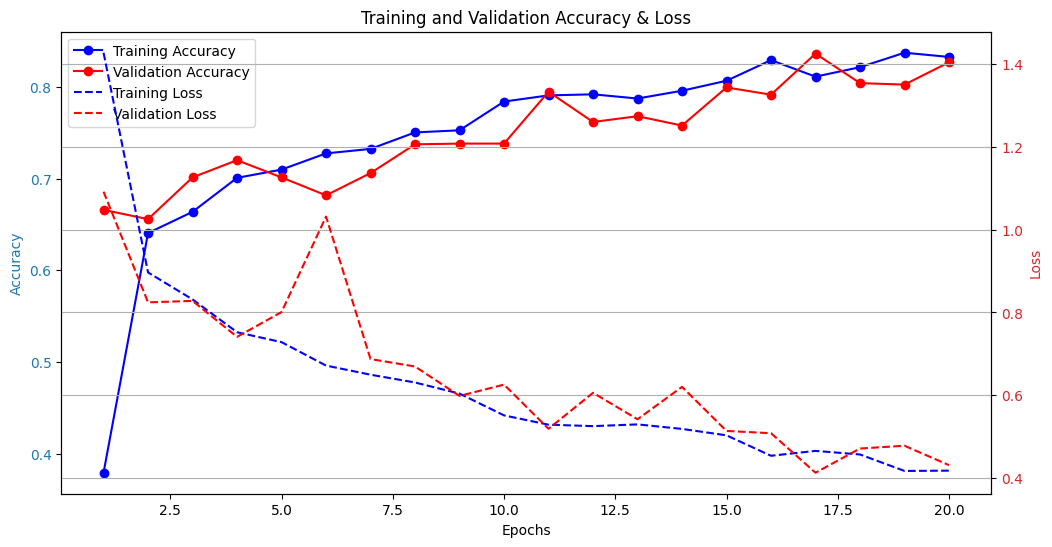

In [9]:
import matplotlib.pyplot as plt

# Assuming you have these lists from your training history
epochs = range(1, 21)
train_accuracy = [0.3791, 0.6407, 0.6639, 0.7010, 0.7100, 0.7277, 0.7326, 0.7506, 0.7529, 0.7843, 0.7910, 0.7922, 0.7876, 0.7961, 0.8070, 0.8295, 0.8115, 0.8218, 0.8376, 0.8330]
val_accuracy = [0.6661, 0.6559, 0.7015, 0.7203, 0.7015, 0.6819, 0.7062, 0.7376, 0.7384, 0.7384, 0.7950, 0.7620, 0.7683, 0.7581, 0.7997, 0.7918, 0.8366, 0.8044, 0.8028, 0.8272]
train_loss = [1.4267, 0.8966, 0.8315, 0.7524, 0.7284, 0.6719, 0.6499, 0.6311, 0.6043, 0.5517, 0.5293, 0.5258, 0.5300, 0.5191, 0.5036, 0.4543, 0.4661, 0.4574, 0.4177, 0.4184]
val_loss = [1.0914, 0.8244, 0.8280, 0.7412, 0.8010, 1.0314, 0.6876, 0.6697, 0.5987, 0.6260, 0.5194, 0.6062, 0.5424, 0.6205, 0.5142, 0.5087, 0.4134, 0.4718, 0.4785, 0.4317]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting accuracy
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
ax1.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a second y-axis for loss
ax2 = ax1.twinx()
ax2.set_ylabel('Loss', color='tab:red')
ax2.plot(epochs, train_loss, 'b--', label='Training Loss')
ax2.plot(epochs, val_loss, 'r--', label='Validation Loss')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Combining both legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

plt.title('Training and Validation Accuracy & Loss')
plt.grid(True)
plt.show()

